<a href="https://colab.research.google.com/github/edgarreis/text-recognize/blob/main/projeto_final_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto Final**



Pré-requisitos

In [1]:
# Instalação Libs

!pip install opencv-python;
!sudo apt install tesseract-ocr;
!pip install pytesseract==0.3.9;
#!tesseract --list-langs
!apt-get install tesseract-ocr-por;

# Instalação Libs

!pip install opencv-python;
!sudo apt install tesseract-ocr;
!pip install pytesseract==0.3.9;
#!tesseract --list-langs
!apt-get install tesseract-ocr-por;

# Importar dependências

import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import cv2
import re
import os

from google.colab.patches import cv2_imshow
from PIL import Image
from pytesseract import Output
from PIL import ImageFont, ImageDraw, Image

# Importar Pasta de Linguas pré-definidas

!mkdir tessdata

!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,768 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

**Funções**

In [34]:
# Funções

# Caixa nos Textox encontrados
def caixa_texto(i, resultado, img, cor = (255, 100, 0)):
  #print('Print caixa_texto i:{}, resultado:{}\n'.format(i,texto))
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]
  #print('Print resultado x:{}, y:{}, w:{}, h:{}\n'.format(x,y, w, h))

  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img

# Reescrever o texto encotrado
def escreve_texto(texto, x, y, img, fonte, tamanho_texto = 32, cor_texto = (0, 0, 255)):
  # Defina a cor do texto como vermelho (BGR: 0, 0, 255)

  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte, fill = cor_texto)
  img = np.array(img_pil)

  return img

# Mostrar imagem no output
def mostrar_imagem(img):
  fig = plt.gcf()               # busca a figura atual
  fig.set_size_inches(20,10)    # define o tamanho
  plt.axis('off')               # remove a vizualização dos eixos
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    # Faz a conversão de cores
  plt.show()                    # mostrar imagem

# Reconhecimento da texto na Imagem
def OCR_processa(img, config_tesseract):
  texto = pytesseract.image_to_string(img, lang='por', config='config_tesseract')
  return texto

# Reconhecimento da texto na Imagem e apresenta
def OCR_processa_imagem(img, termo_pesquisa, config_tesseract = '--tessdata-dir tessdata', min_conf = 30):

  # Pré-processamento da imagem (imagem para metadados)
  resultado = pytesseract.image_to_data(img, config = config_tesseract, lang = 'por', output_type = Output.DICT)

  # Identificação da Palavras e Marcação
  tipo_fonte = '/content/drive/MyDrive/Colab Notebooks/Imagens/calibri.ttf'
  cor_vermelho = (0,0,255)

  num_ocorrencias = 0  # inicializa com 0

  for i in range(0, len(resultado['text'])):
    confianca = int(resultado['conf'][i])

    if confianca > min_conf:
      texto = resultado['text'][i]

      #print('Print FOR i:{}, len(resultado[text]:{}, confianca:{}, termo_pesquisa:{}, num_ocorrencias:{}, texto:{}\n'.format(i, len(resultado['text']), confianca, termo_pesquisa, num_ocorrencias, texto))

      #if re.match(termo_pesquisa, texto):
      if termo_pesquisa.lower() in texto.lower():  # Transformado para minusculo
        x, y, img = caixa_texto(i, resultado, img, cor_vermelho)
        img = escreve_texto(texto, x, y, img, tipo_fonte, tamanho_texto=14, cor_texto=(50,50,255))
        num_ocorrencias += 1

  return img, num_ocorrencias



**Transformando Imagem em Texto**

In [49]:
# Importando Arquivos
projeto = '/content/drive/MyDrive/Colab Notebooks/Imagens/Projeto'
#projeto = '/content/drive/MyDrive/Colab Notebooks/Atividades/Aula 5'
caminho = [os.path.join(projeto, f) for f in os.listdir(projeto)]

# Ler Imagens
'''
for imagem in caminho:
  imagem = cv2.imread(imagem)
  mostrar_imagem(imagem)
'''

# Configuração do Tesseract
config_tesseract = '--tessdata-dir tessdata'

# Reconhecimento de Texto
texto_completo = ''
nome_txt = 'resultado_ocr.txt'

for imagem in caminho:  # percorre as imagens no caminho
  img = cv2.imread(imagem)  # lê a imagem
  nome_imagem = os.path.split(imagem)[-1]  # recebe os nomes e os diretórios das imagens, quebrados, precisamos apenas nome do diretório (-1)
  nome_divisao = '======================\n' + str(nome_imagem) # divisão para os arquivos diversos
  texto_completo = texto_completo + nome_divisao + '\n' # recebe o texto
  texto = OCR_processa(img, config_tesseract) # passa para texto a imagem
  texto_completo = texto_completo + texto + '\n' # concatena tudo

# Salvando o arquivo em txt
arquivo_txt = open(nome_txt, 'w+') # a+ para colocar no final do arquivo, w+
arquivo_txt.write(texto_completo)
arquivo_txt.close()



**Pesquisando Palavras no Arquivo**

In [39]:
termo_pesquisa = 'ambiente'   #'ambiente'     #'learning'

with open(nome_txt) as f:
  # lista de ocorrências
  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, f.read())]
  # inicia-se em i, com regex para encontrar o termo, retornando a posição onde está

arquivo_txt.close()

In [40]:
ocorrencias

[287, 444, 583, 666, 704, 734, 794, 827, 878, 934, 991, 1032, 1074, 1612]

**Mostrando as Ocorrências**

In [41]:
# Na listagem da imagem
for imagem in caminho:  # percorre as imagens no caminho
  img = cv2.imread(imagem)  # lê a imagem
  nome_imagem = os.path.split(imagem)[-1]  # recebe os nomes e os diretórios das imagens, quebrados, precisamos apenas nome do diretório (-1)
  print('======================\n' + str(nome_imagem)) # divisão para os arquivos diversos

  texto = OCR_processa(img, config_tesseract) # passa para texto a imagem

  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, texto)]

  print('Numero de ocorrências para o termo: {}: {} \n'.format(termo_pesquisa, len(ocorrencias)))


Aula5-Ambientes_Virtuais.png
Numero de ocorrências para o termo: ambiente: 13 

Aula5-Visao.png
Numero de ocorrências para o termo: ambiente: 1 

Aula5-ROC.png
Numero de ocorrências para o termo: ambiente: 0 

Aula5-Microstrategy.png
Numero de ocorrências para o termo: ambiente: 0 

Aula5-GitHub.png
Numero de ocorrências para o termo: ambiente: 0 



**Mostrando nas Imagens**

Escreva o Termo da pesquisa: dados
artigo-eng-dados.png
Numero de ocorrências para "dados" em artigo-eng-dados.png: 3 



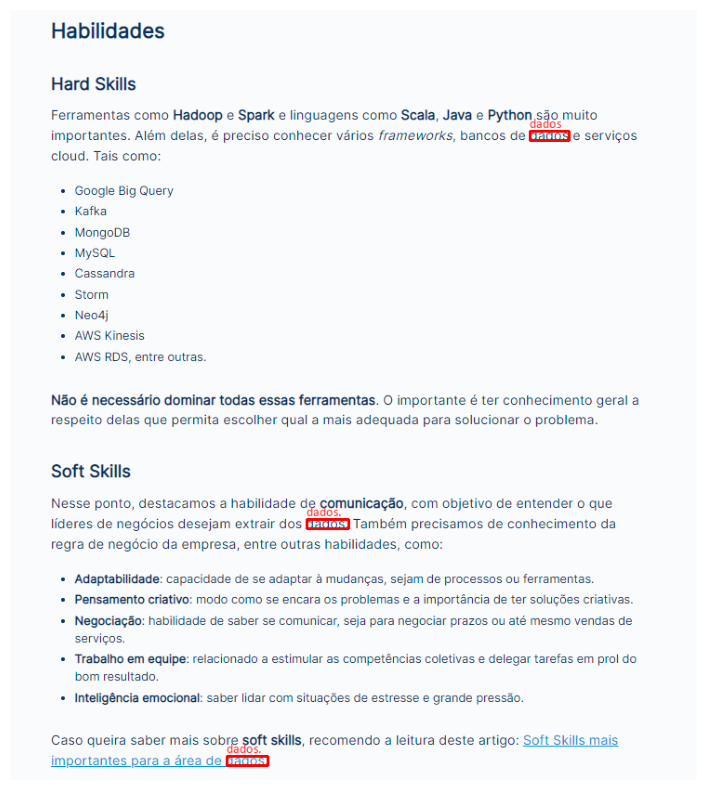

artigo-termos-ML.png
Numero de ocorrências para "dados" em artigo-termos-ML.png: 3 



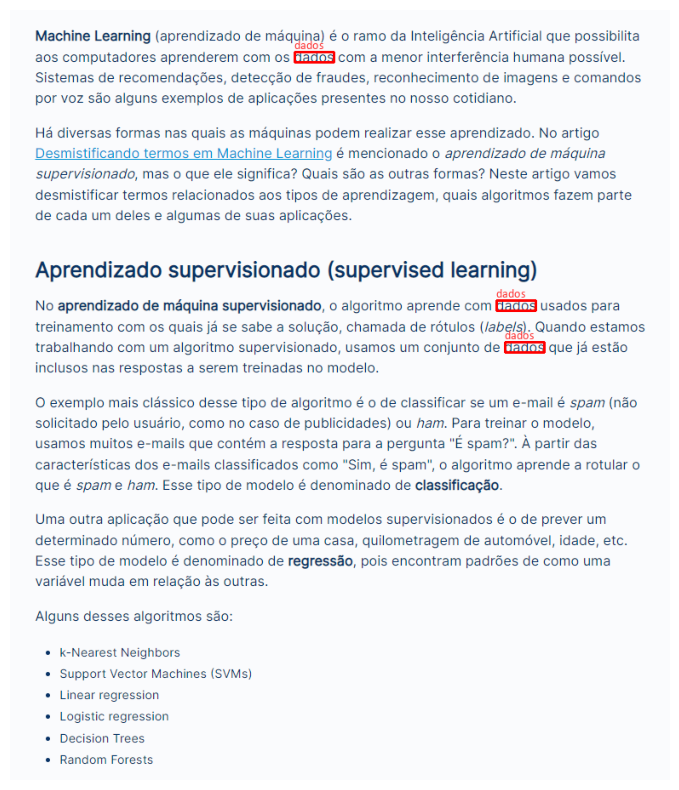

artigo-desbalanceamento.png
Numero de ocorrências para "dados" em artigo-desbalanceamento.png: 12 



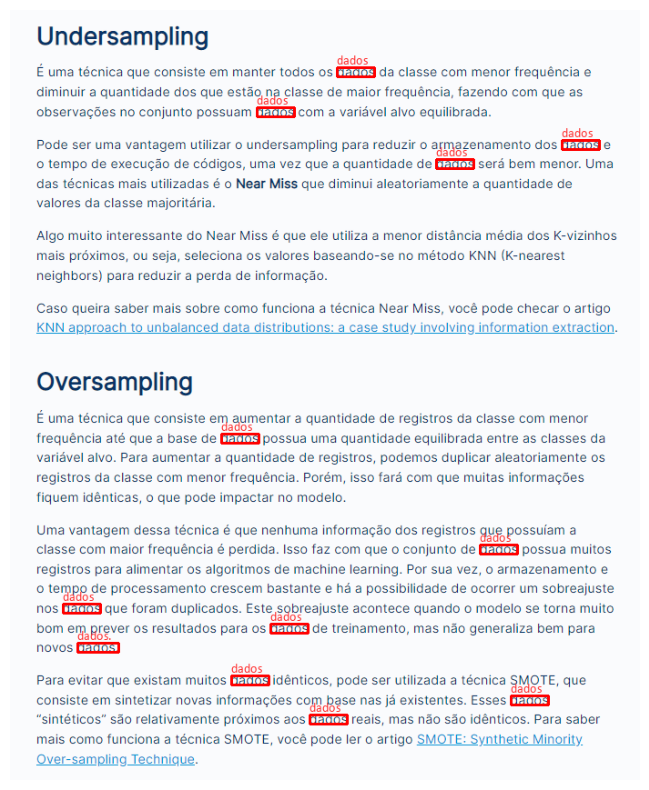

artigo-spark.png
Numero de ocorrências para "dados" em artigo-spark.png: 16 



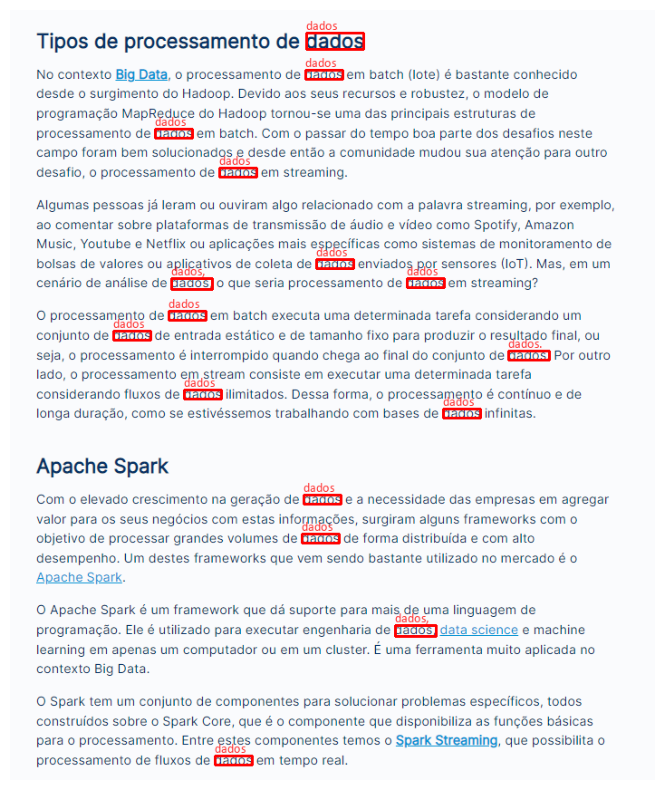

In [51]:
# Criando Diretório para Salvar a Imagem
os.makedirs('/content/drive/MyDrive/Colab Notebooks/images_project', exist_ok=True)

# Termo da Pesquisa
#termo_pesquisa = 'learning'   #'ambiente'     #'learning'
termo_pesquisa = input('Escreva o Termo da pesquisa: ')
# Configuração do Tesseract
config_tesseract = '--tessdata-dir tessdata'
min_conf = 30

# Na listagem da imagem
for imagem in caminho:  # percorre as imagens no caminho
  # lê a imagem
  img = cv2.imread(imagem)

  # Copia a imagem para edição
  img_copia = img.copy()

  # Indica qual arquivo
  nome_imagem = os.path.split(imagem)[-1]  # recebe os nomes e os diretórios das imagens, quebrados, precisamos apenas nome do diretório (-1)
  print('======================\n' + str(nome_imagem)) # divisão para os arquivos diversos

  # Processa a image
  img, num_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf)    # , config_tesseract = '--tessdata-dir tessdata --psm 6', min_conf = 40

  # Indica as ocorrências
  print('Numero de ocorrências para "{}" em {}: {} \n'.format(termo_pesquisa, nome_imagem, num_ocorrencias))

  if num_ocorrencias > 0:

    # Mostra a imagem
    #cv2_imshow(img)
    mostrar_imagem(img)
    # Caminho
    nova_imagem = '/content/drive/MyDrive/Colab Notebooks/images_project/' + str('OCR' + '-Palavra_chave_' + termo_pesquisa + '_em_' + nome_imagem)
    # Salva
    cv2.imwrite(nova_imagem, img)

